# Classifying Documents

In this notebook we demonstrate a basic document level classification of reports with respect to a single finding ( fever). We leverage the convenience of Pandas to read our data from a MySQL database and then use Pandas to add our classification as a new column in the dataframe.

Many of the common pyConTextNLP tasks have been wrapped into functions contained in the [``radnlp``](https://github.com/chapmanbe/RadNLP) pacakge. We important multiple modules that will allow us to write concise code.

In [1]:
from utils import *
import pandas as pd


data = get_data()
data.head(5)

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Document Classification

We now need to apply our schema to the reports. Since our data is in a Pandas data frame, the easiest way to process our reports is with the DataFrame [``apply``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) method.

* We use ``lambda`` to create an anonymous function which basically just applies ``analyze_report`` to the ``"impression"`` column with the modifiers, targets, etc. that we have read in separately.
* ``analyze_report`` returns a dictionary with ``keys`` as any identified targets defined in the ``"targets"`` file and values as a tuple with values:
    * The schema value that was selected for the document
    * The node (evidence) that was used for selecting that schema value
    

In [3]:
options = getOptions()
kb = get_kb_rules_schema(options)
#data = data.dropna()

data["pe rslt"] = \
    data.apply(lambda x: analyze_report(x["impression"], 
                                         kb["modifiers"], 
                                         kb["targets"],
                                         kb["rules"],
                                         kb["schema"]), axis=1)

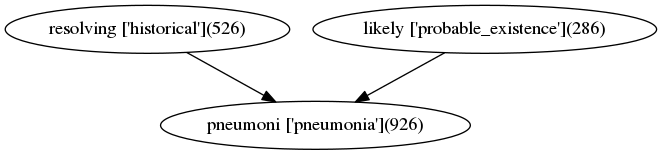

report,classification
Unchanged minimal left retrocardiac opacity reflecting likely resolving pneumonia.,pneumonia (Positive/Uncertain/Chronic)


In [4]:
view_markup(data, colors)